In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Image
import csv

from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns

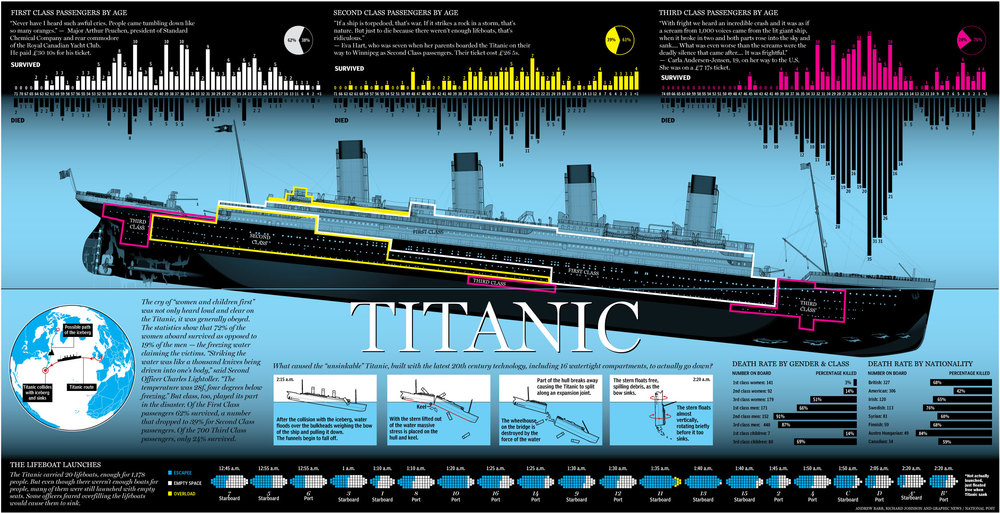

In [81]:
Image('https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg')

In [7]:
df=sns.load_dataset("titanic")
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe(include='object')

<br>

## PANDAS 데이터 프레임 분석

조회, 정렬, 조건 필터 등을 이용해 csv, 엑셀 데이터를 분석함
 - pandas : https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
 - numpy 
 - seaborn 데이터셋 이용
  * https://seaborn.pydata.org/generated/seaborn.load_dataset.html
  * https://github.com/mwaskom/seaborn-data

1. value_count : 원하는 column의 데이터 분포를 확인

In [ ]:
df['who'].value_counts()

2. sort_values, sort_index : 오름차순 정렬, 내림차순으로 할 경우 ascending=False

In [ ]:
df.sort_values(by='age', ascending=False).head()

In [ ]:
df.sort_index().head(5)

In [ ]:
df.sort_values(by=['age','class'], ascending=[True, False]).head()

3. loc : indexing과 slicing 필터링 [시작:끝]

In [ ]:
df.loc[5, 'class']

In [ ]:
df.loc[2:5, ['age', 'fare','who']]

In [ ]:
df.loc[:6, 'age':'class']

4. loc : 조건에 따라 사용하는 방법

In [5]:
cd = df['who']=='man'
cd

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: who, Length: 891, dtype: bool

In [ ]:
df.loc[cd].head()

In [ ]:
df.loc[cd, 'age']=10
df[cd].head()

In [66]:
cd1 = (df['fare']>10)
cd2 = (df['who']=='woman')

In [ ]:
df.loc[cd1 & cd2].head()

In [ ]:
df.loc[cd1 | cd2].head()

- 나이 20살 미만 10살 이상
- 성별 남자
- 생손자 기준으로 내림차순, 10명

In [67]:
cd3 = (df['age'] < 20) & (df['age'] >= 10)
cd4 = (df['who']=='man')
df.loc[cd1 & cd2, 'survived':'fare'].sort_values(by='fare', ascending=False).head(10)

,survived,pclass,sex,age,sibsp,parch,fare
258,1,1,female,35.0,0,0,512.3292
341,1,1,female,24.0,3,2,263.0000
88,1,1,female,23.0,3,2,263.0000
742,1,1,female,21.0,2,2,262.3750
311,1,1,female,18.0,2,2,262.3750
299,1,1,female,50.0,0,1,247.5208
700,1,1,female,18.0,1,0,227.5250
380,1,1,female,42.0,0,0,227.5250
716,1,1,female,38.0,0,0,227.5250
730,1,1,female,29.0,0,0,211.3375


5. iloc : 인덱스 기반 데이터 가져오기

In [ ]:
df.iloc[1,2]

In [ ]:
df.iloc[[0,5,10],[0,1,2,4]]

In [69]:
csv_test=df.iloc[:3,:5]
csv_test

,survived,pclass,sex,age,sibsp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0


In [82]:
df.to_csv("titanic.csv", mode='w')
csv_test.to_csv("test2.csv", mode='w')

In [77]:
df2=pd.read_csv('test2.csv',  index_col=0)
df2

,survived,pclass,sex,age,sibsp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0


### Matplotlib 사용해서 시각화 하기

- 예제 : https://matplotlib.org/stable/tutorials/introductory/pyplot.html

In [2]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

In [ ]:
t = np.arange(0., 5., 0.2)
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3 ,'g^')
plt.show()

In [ ]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

In [ ]:
np.random.randint(0,50,50)

In [ ]:
np.random.randn(50)

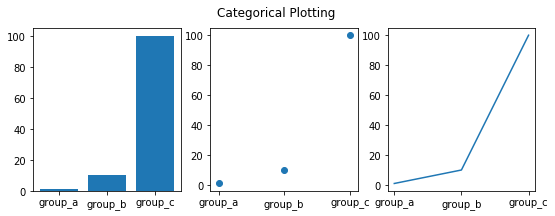

In [3]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(1,3,1)
plt.bar(names, values)
plt.subplot(1,3,2)
plt.scatter(names, values)
plt.subplot(1,3,3)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

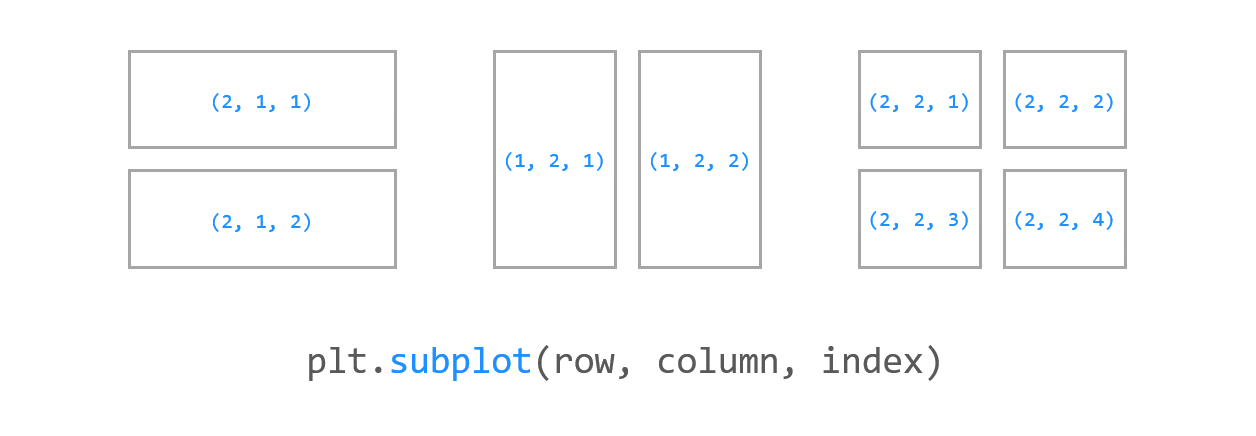

In [80]:
Image('edu.png')

<BarContainer object of 891 artists>

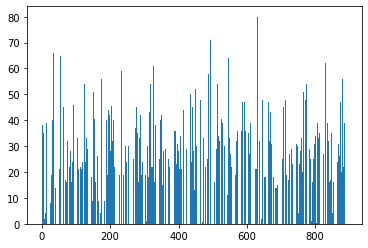

In [41]:
test=df['age']
plt.bar(np.arange(1,892),test)

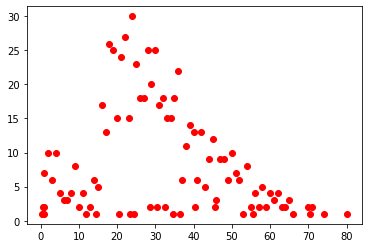

In [42]:
plt.plot(df['age'].value_counts(),'ro')
plt.show()

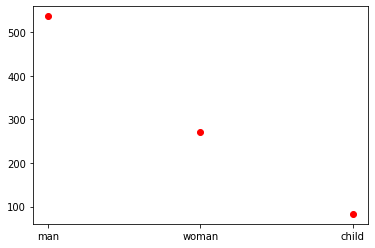

In [21]:
plt.plot(df['who'].value_counts(),'ro')
plt.show()

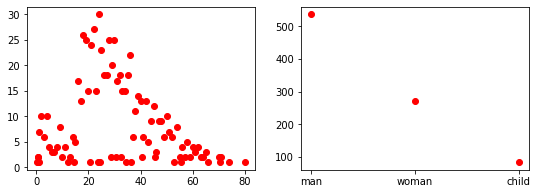

In [64]:
t=np.arange(1,100,10)
plt.figure(figsize=(9, 3))

plt.subplot(1,2,1)
plt.plot(df['age'].value_counts(),'ro')
plt.subplot(1,2,2)
plt.plot(df['who'].value_counts(),'ro')
plt.show()